In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics



# Load data

In [66]:
red = pd.read_csv("winequality-red.csv", sep=';')

In [49]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [50]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# Visualization 

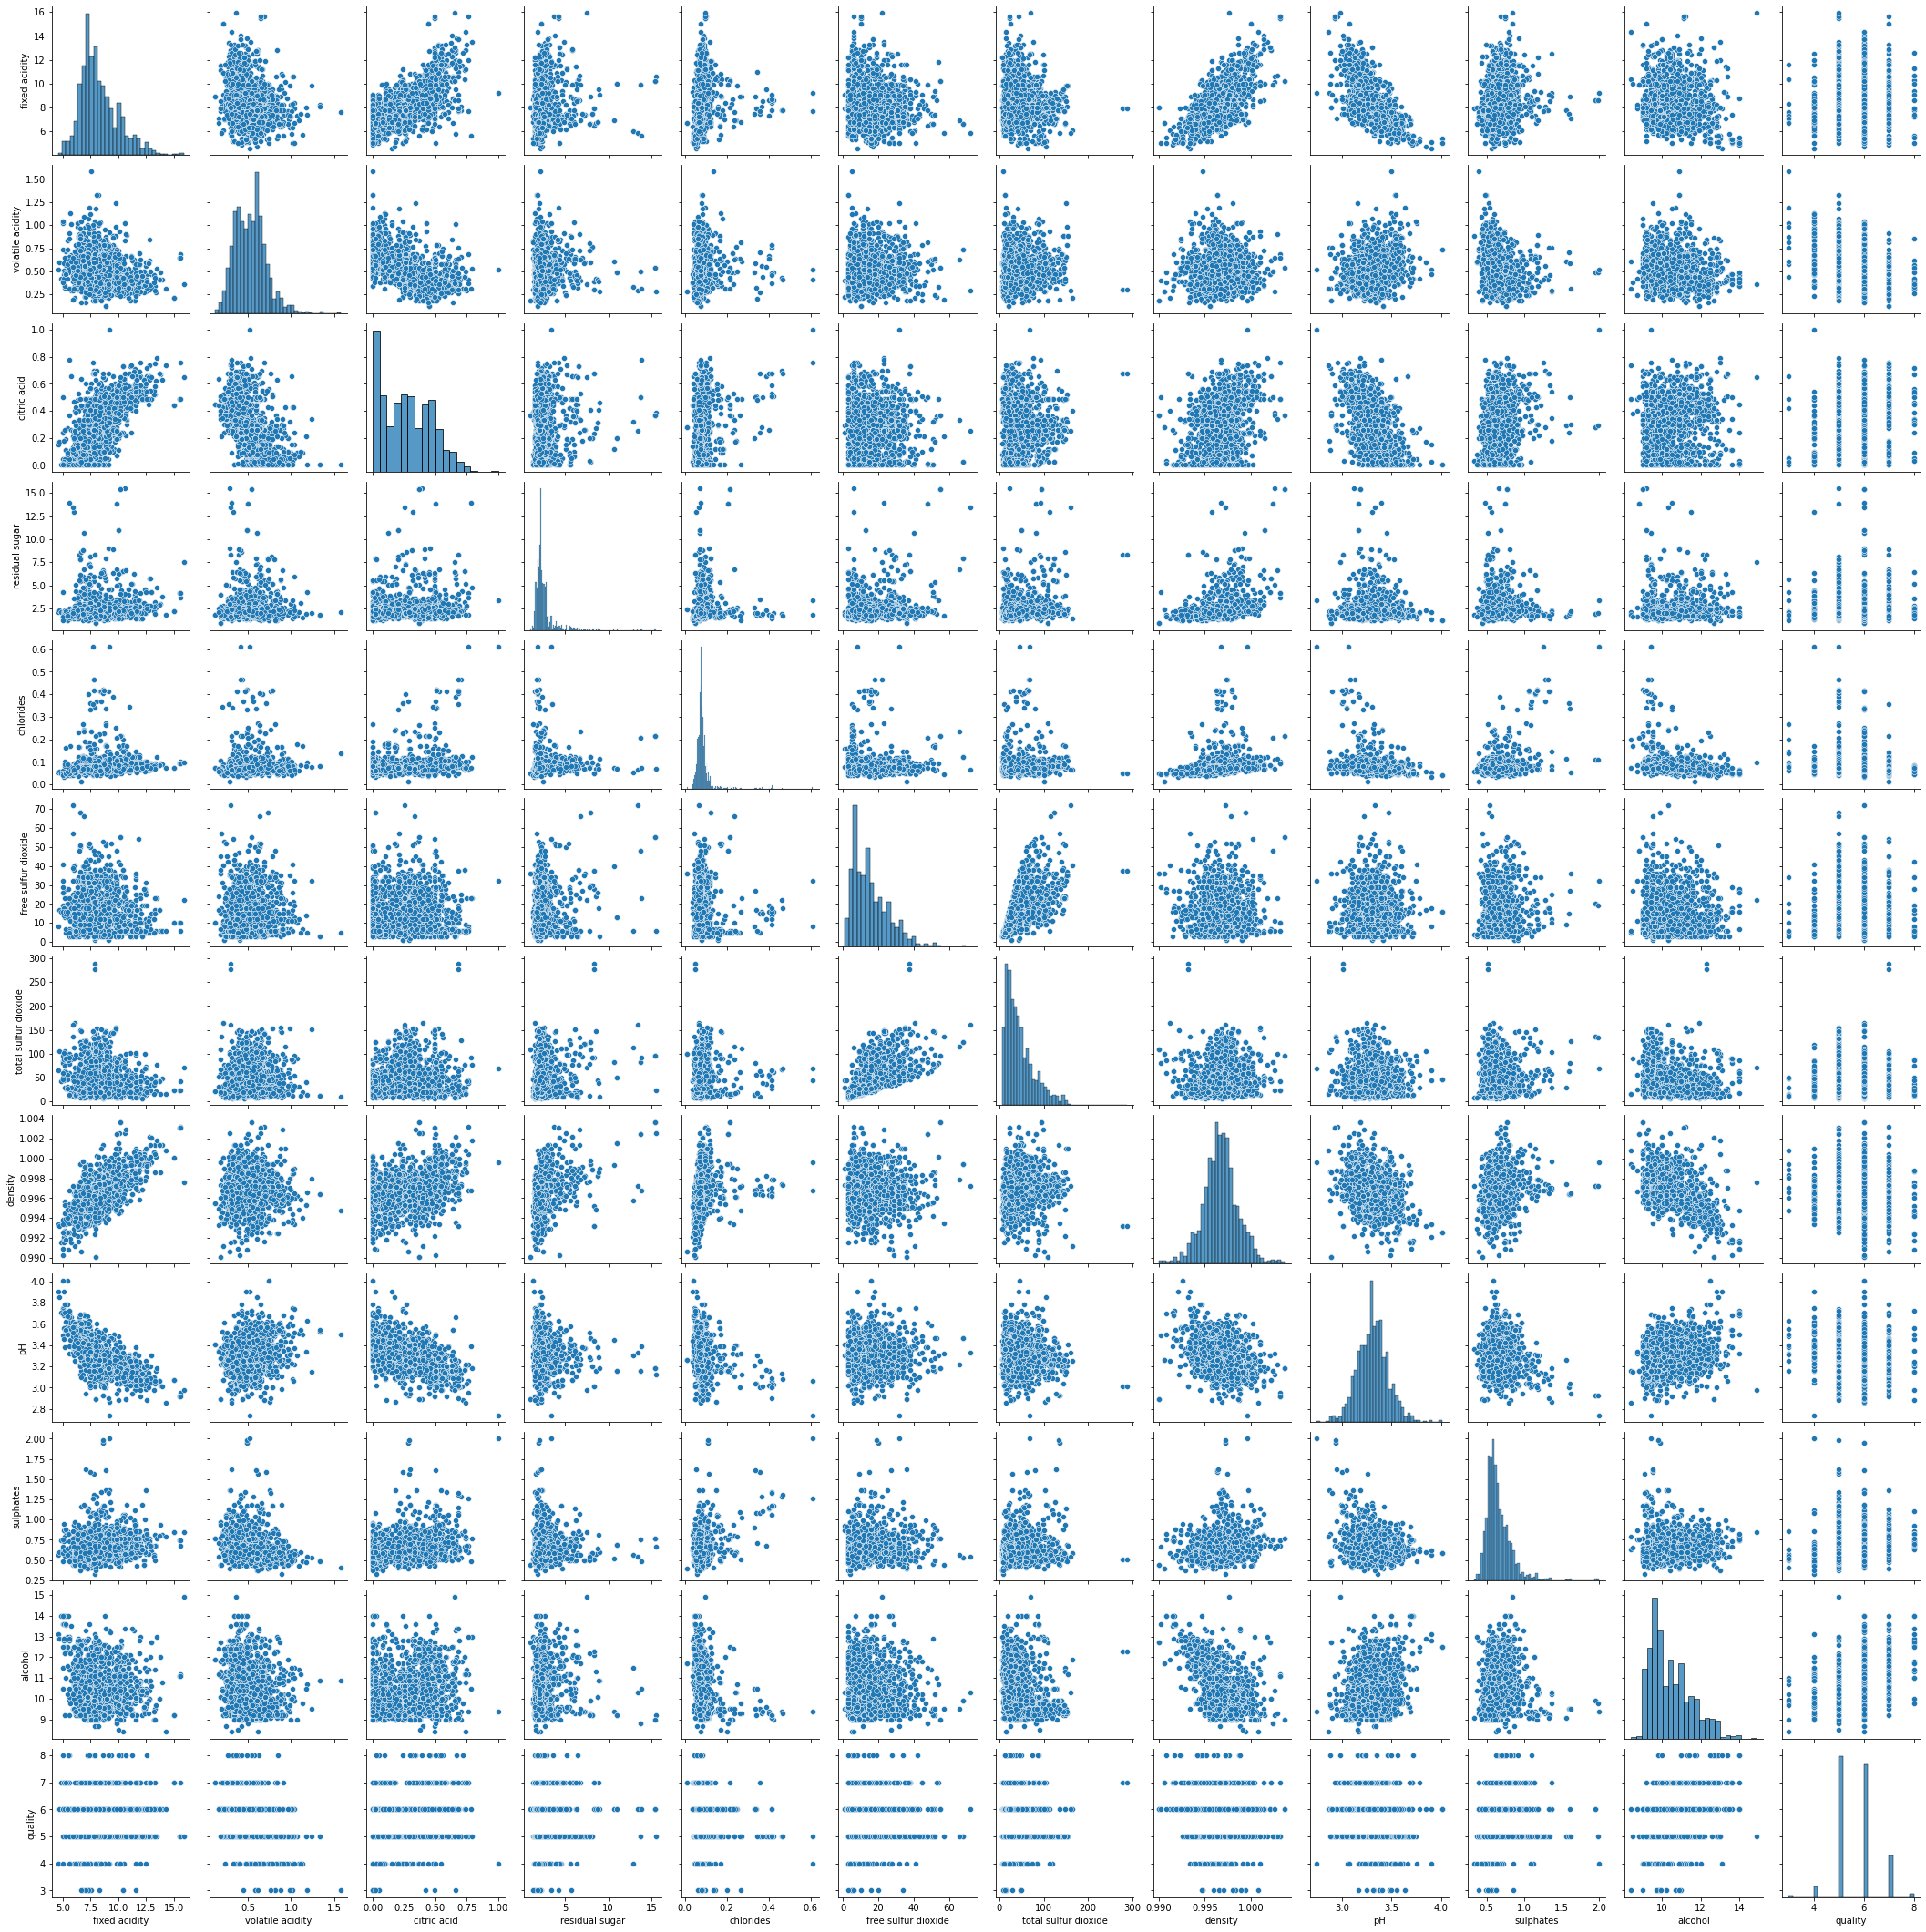

In [51]:
sns.pairplot(red)

<AxesSubplot:>

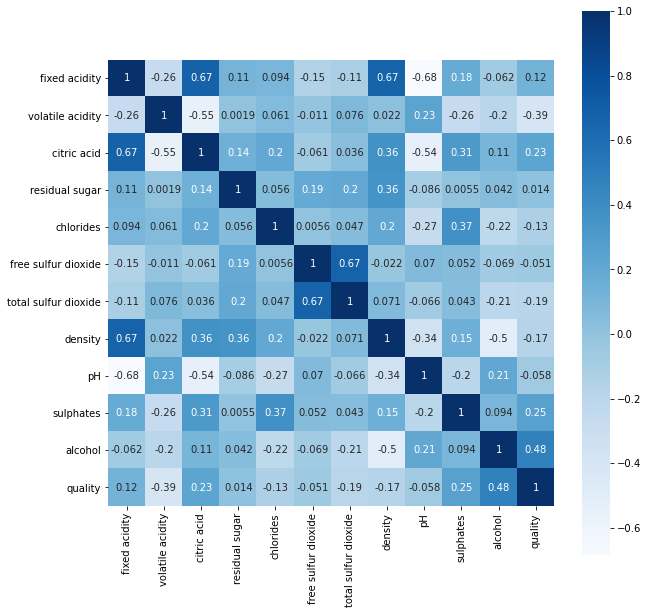

In [52]:
correlation = red.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

Removed outliers with zscoree

In [74]:
from scipy import stats
z = np.abs(stats.zscore(red))
red = red[(z < 3).all(axis=1)]
red.shape

(1451, 12)

In [67]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [68]:
red["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Data Preprocessing

In [69]:
# Define features X
X = np.asarray(red.iloc[:,:-1])# Define target y
y = np.asarray(red["quality"])

# Train and test set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ("Train set:", X_train.shape, y_train.shape)
print ("Test set:", X_test.shape, y_test.shape)


Train set: (1279, 11) (1279,)
Test set: (320, 11) (320,)


# Validation/Model Selection

## Logistical Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression(multi_class="multinomial",solver ="newton-cg")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print("accuracy", accuracy_score(y_test, y_pred))


accuracy = cross_val_score(logreg, X, y, scoring = "roc_auc_ovr",cv=10)

print("cross validation score with roc_auc", accuracy.mean())
print("roc_auc_score",roc_auc_score(y_test,logreg.predict_proba(X_test), multi_class="ovr"))

              precision    recall  f1-score   support

           3      1.000     0.000     0.000         2
           4      1.000     0.000     0.000        11
           5      0.658     0.756     0.703       135
           6      0.622     0.627     0.625       142
           7      0.409     0.333     0.367        27
           8      1.000     0.000     0.000         3

    accuracy                          0.625       320
   macro avg      0.782     0.286     0.283       320
weighted avg      0.638     0.625     0.605       320

accuracy 0.625
cross validation score with roc_auc 0.7910407311982046
roc_auc_score 0.7312427759625839


cross validation scroe is higher but last recall results are 0 indicating we need to add some polynomial features

## K-Nearest Neighbors

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
knn.score(X_test,y_test)

0.5125

In [65]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5,shuffle=True)

In [43]:
from sklearn.model_selection import cross_val_score

neighbors = np.arange(1, 16, 2)
cross_val_scores = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score (knn, X_train, y_train, cv = skfold)
    cross_val_scores.append(np.mean(scores))
    
print("Best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best = neighbors[np.argmax(cross_val_scores)]
print("Best neighbors: {}".format(best))

Best cross-validation score: 0.622
Best neighbors: 11


In [44]:
knn = KNeighborsClassifier(n_neighbors=best)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.5735849056603773